<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt


<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [47]:
import numpy as np
import unittest

def sum_prod(matrices, vectors):
    if not matrices and not vectors:
        return np.zeros((0, 1))

    if len(matrices) != len(vectors):
        raise ValueError("Количество матриц и векторов должно совпадать.")
    
    n = matrices[0].shape[0]

    result = np.zeros((n, 1))

    for i in range(len(matrices)):
        M = matrices[i]
        V = vectors[i]
        
        if M.shape != (n, n):
            raise ValueError(f"Матрица под индексом {i} имеет неправильную размерность")
        
        if V.ndim == 1:
            if V.shape[0] != n:
                raise ValueError(f"Вектор под индексом {i} имеет неправильную размерность")
            V = V.reshape(n, 1)
        elif V.shape != (n, 1):
            raise ValueError(f"Вектор под индексом {i} имеет неправильную размерность")
        
        result += M @ V

    return result

class TestSumProd(unittest.TestCase):
    
    def test_standard_case(self):
        M1 = np.array([[1, 2], [3, 4]])
        M2 = np.array([[5, 6], [7, 8]])
        X = [M1, M2]
        
        V1 = np.array([1, 0])
        V2 = np.array([0, 1])
        V = [V1, V2]
        
        expected = np.array([[7], [11]])
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_single_matrix_vector(self):
        M = np.array([[2, 0], [0, 2]])
        V = [np.array([3, 4])]
        X = [M]
        
        expected = np.array([[6], [8]])
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_empty_lists(self):
        X = []
        V = []
        expected = np.zeros((0, 1))
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_mismatched_matrix_vector_shapes(self):
        M = np.array([[1, 2], [3, 4]])
        V = [np.array([1, 2, 3])]  
        X = [M]
        
        with self.assertRaises(ValueError) as context:
            sum_prod(X, V)
        self.assertIn("Вектор под индексом 0 имеет неправильную размерность", str(context.exception))
    
    def test_incorrect_matrix_size(self):
        M1 = np.array([[1, 2, 3], [4, 5, 6]])  
        M2 = np.array([[7, 8, 9], [10, 11, 12]])
        V1 = np.array([1, 2])
        V2 = np.array([3, 4])
        X = [M1, M2]
        V = [V1, V2]
        
        with self.assertRaises(ValueError) as context:
            sum_prod(X, V)
        self.assertIn("Матрица под индексом 0 имеет неправильную размерность", str(context.exception))
    
    def test_vector_as_column(self):
        M1 = np.array([[1, 0], [0, 1]])
        M2 = np.array([[0, 1], [1, 0]])
        X = [M1, M2]
        
        V1 = np.array([[2], [3]])  
        V2 = np.array([[4], [5]])
        V = [V1, V2]
        
        expected = np.array([[7], [7]])
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_large_p(self):
        p = 100
        n = 50
        X = [np.identity(n) for _ in range(p)]
        V = [np.ones(n) for _ in range(p)]
        
        expected = np.ones((n, 1)) * p
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_mismatched_lengths(self):
        M1 = np.array([[1, 2], [3, 4]])
        V1 = np.array([1, 2])
        M2 = np.array([[5, 6], [7, 8]])
        V2 = np.array([3, 4])
        X = [M1, M2]
        V = [V1]
        
        with self.assertRaises(ValueError) as context:
            sum_prod(X, V)
        self.assertIn("Количество матриц и векторов должно совпадать", str(context.exception))

unittest.main(argv=[''], exit=False)


....................
----------------------------------------------------------------------
Ran 20 tests in 0.016s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [48]:
import numpy as np
import unittest

def binarize(M, threshold=0.5):
    M = np.array(M) 
    return (M > threshold).astype(int) 

class TestBinarizeFunction(unittest.TestCase):
    
    def test_binarize_default_threshold(self):
        M = [[0.1, 0.5, 0.6], [0.3, 0.8, 0.2]]
        expected_output = np.array([[0, 0, 1], [0, 1, 0]])  
        np.testing.assert_array_equal(binarize(M), expected_output)

    def test_binarize_custom_threshold(self):
        M = [[0.1, 0.5, 0.6], [0.3, 0.8, 0.2]]
        threshold = 0.4
        expected_output = np.array([[0, 1, 1], [0, 1, 0]])  
        np.testing.assert_array_equal(binarize(M, threshold), expected_output)

    def test_binarize_all_zero(self):
        M = [[0.0, 0.0], [0.0, 0.0]]
        expected_output = np.array([[0, 0], [0, 0]]) 
        np.testing.assert_array_equal(binarize(M), expected_output)
    
    def test_binarize_all_one(self):
        M = [[1.0, 1.0], [1.0, 1.0]]
        expected_output = np.array([[1, 1], [1, 1]]) 
        np.testing.assert_array_equal(binarize(M), expected_output)
    
    def test_binarize_mixed_values(self):
        M = [[-1.0, 0.0, 0.5, 1.0], [0.0, 0.5, 2.0, 3.0]]
        threshold = 0.5
        expected_output = np.array([[0, 0, 0, 1], [0, 0, 1, 1]])  
        np.testing.assert_array_equal(binarize(M, threshold), expected_output)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


....................
----------------------------------------------------------------------
Ran 20 tests in 0.012s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [191]:
def unique_rows(mat):
    # Your code goes here
    pass

def unique_columns(mat):
    # Your code goes here
    pass

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

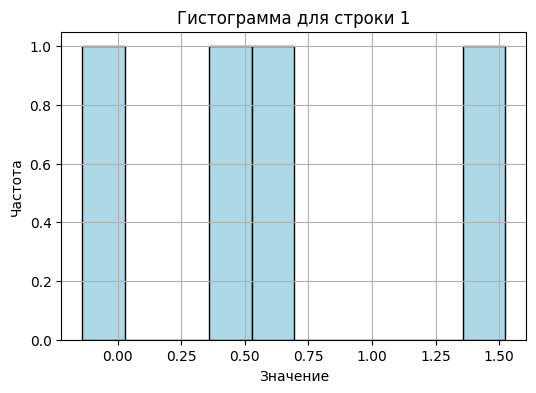

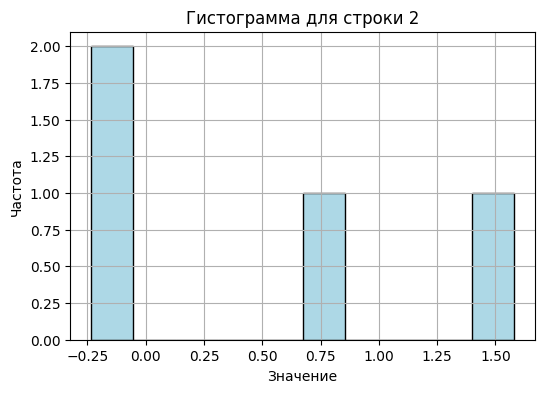

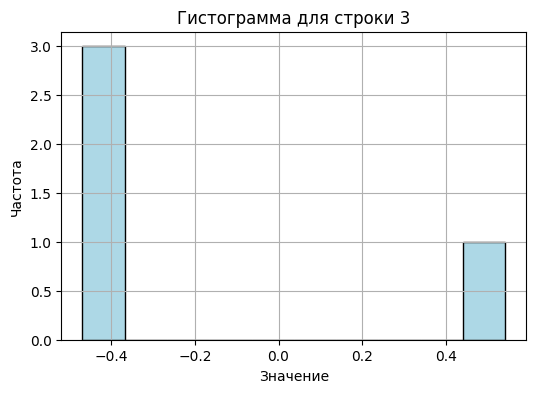

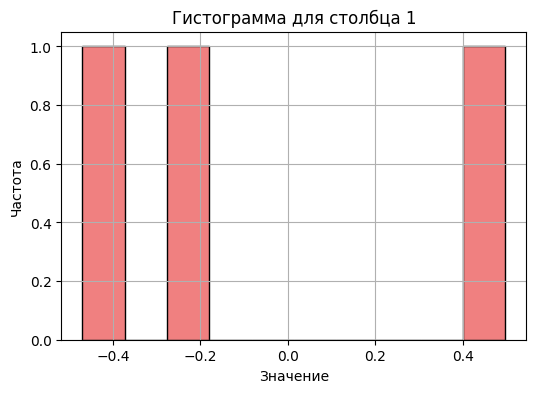

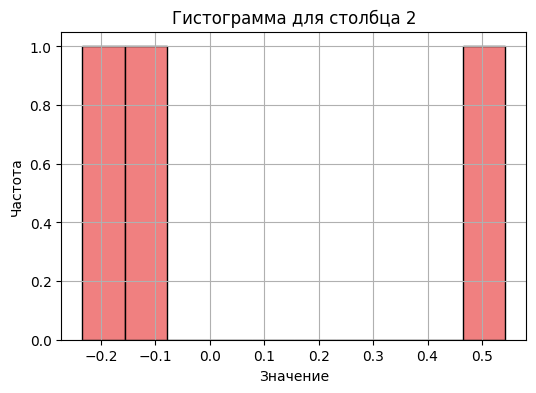

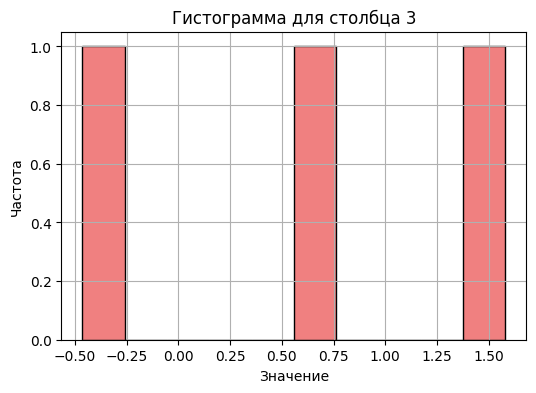

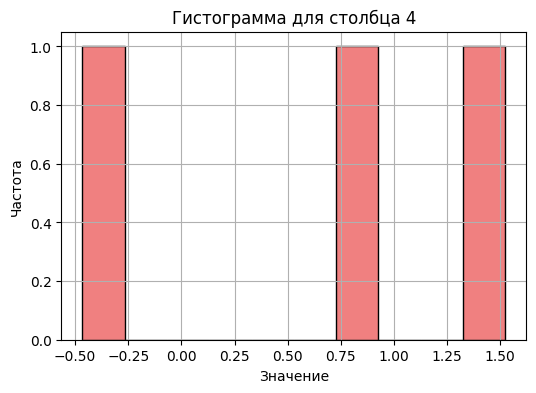

Сгенерированная матрица:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]

Средние значения по строкам: [ 0.63229206  0.4695893  -0.21401545]
Дисперсии по строкам: [0.35144734 0.57761516 0.19080683]

Средние значения по столбцам: [-0.0689712   0.0567196   0.58782789  0.60824494]
Дисперсии по столбцам: [0.16922929 0.1195524  0.69718155 0.67186482]


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def create_normal_matrix(rows, cols, mean=0, std_dev=1, threshold=None, seed=None):
    if seed is not None:
        np.random.seed(seed)

    matrix = np.random.normal(loc=mean, scale=std_dev, size=(rows, cols))

    if threshold is not None:
        matrix = (matrix > threshold).astype(int)

    means_rows = np.mean(matrix, axis=1)
    variances_rows = np.var(matrix, axis=1)

    means_columns = np.mean(matrix, axis=0)
    variances_columns = np.var(matrix, axis=0)

    for idx in range(rows):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[idx, :], bins=10, color='lightblue', edgecolor='black')
        plt.title(f'Гистограмма для строки {idx + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    for idx in range(cols):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[:, idx], bins=10, color='lightcoral', edgecolor='black')
        plt.title(f'Гистограмма для столбца {idx + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    return matrix, means_rows, variances_rows, means_columns, variances_columns

M, row_means, row_variances, col_means, col_variances = create_normal_matrix(3, 4, seed=42)

print("Сгенерированная матрица:\n", M)
print("\nСредние значения по строкам:", row_means)
print("Дисперсии по строкам:", row_variances)
print("\nСредние значения по столбцам:", col_means)
print("Дисперсии по столбцам:", col_variances)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [186]:
def chess(m, n, a, b):
    matrix = [[0] * n for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    
    return matrix

def test_chess():
    result1 = chess(2, 2, 1, 2)
    expected1 = [[1, 2], [2, 1]]
    assert result1 == expected1, f"Тест 1 не пройден: получено {result1}, ожидалось {expected1}"

    result2 = chess(3, 3, 3, 5)
    expected2 = [[3, 5, 3], [5, 3, 5], [3, 5, 3]]
    assert result2 == expected2, f"Тест 2 не пройден: получено {result2}, ожидалось {expected2}"

    result3 = chess(4, 5, 7, 8)
    expected3 = [[7, 8, 7, 8, 7],
                  [8, 7, 8, 7, 8],
                  [7, 8, 7, 8, 7],
                  [8, 7, 8, 7, 8]]
    assert result3 == expected3, f"Тест 3 не пройден: получено {result3}, ожидалось {expected3}"

    result4 = chess(1, 1, 4, 5)
    expected4 = [[4]]
    assert result4 == expected4, f"Тест 4 не пройден: получено {result4}, ожидалось {expected4}"

    result5 = chess(0, 0, 1, 2)
    expected5 = []
    assert result5 == expected5, f"Тест 5 не пройден: получено {result5}, ожидалось {expected5}"

    print("Все тесты пройдены!")

test_chess()


Все тесты пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [187]:
from PIL import Image, ImageDraw

def draw_rectangle(m, n, a, b, bg_color, rect_color):
 
    image = Image.new("RGB", (n, m), bg_color)
    draw = ImageDraw.Draw(image)

    top_left = (0, 0)
    bottom_right = (b, a)

    draw.rectangle([top_left, bottom_right], fill=rect_color)

    return image

def draw_oval(m, n, a, b, bg_color, oval_color):
    
    image = Image.new("RGB", (n, m), bg_color)
    draw = ImageDraw.Draw(image)

    top_left = (n // 2 - b // 2, m // 2 - a // 2)
    bottom_right = (n // 2 + b // 2, m // 2 + a // 2)

    draw.ellipse([top_left, bottom_right], fill=oval_color)

    return image

def test_drawing_functions():
    rect_image = draw_rectangle(100, 200, 50, 100, (255, 255, 255), (255, 0, 0))
    assert rect_image.getpixel((50, 25)) == (255, 0, 0), "Тест 1 не пройден: Прямоугольник не нарисован правильно"
    
    oval_image = draw_oval(100, 200, 50, 100, (255, 255, 255), (0, 0, 255))
    assert oval_image.getpixel((100, 50)) == (0, 0, 255), "Тест 2 не пройден: Овал не нарисован правильно"

    assert oval_image.getpixel((0, 0)) == (255, 255, 255), "Тест 3 не пройден: Цвет фона неверный"
    
    print("Все тесты пройдены успешно!")

if __name__ == "__main__":
    test_drawing_functions()

Все тесты пройдены успешно!


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [23]:
import numpy as np

def analyze_time_series(data, window_size):
    data_length = len(data)
    
    avg = np.mean(data)
    var = np.var(data)
    std_dev_value = np.std(data)

    peaks = []
    troughs = []
    
    for i in range(1, data_length - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            peaks.append(i)
        elif data[i] < data[i - 1] and data[i] < data[i + 1]:
            troughs.append(i)

    filter_window = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, filter_window, mode='valid')
    
    return avg, var, std_dev_value, peaks, troughs, smoothed_data

time_data = np.array([1, 3, 2, 5, 7, 6, 4, 8, 9, 2, 1, 4, 3, 5, 7, 6])
size_of_window = 3  

mean, variance, std_dev, local_peaks, local_troughs, moving_avg = analyze_time_series(time_data, size_of_window)

print(f"Среднее значение: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_dev}")
print(f"Локальные максимумы на индексах: {local_peaks}")
print(f"Локальные минимумы на индексах: {local_troughs}")
print(f"Скользящее среднее (размер окна={size_of_window}): {moving_avg}")


Среднее значение: 4.5625
Дисперсия: 5.74609375
Стандартное отклонение: 2.3971011138456384
Локальные максимумы на индексах: [1, 4, 8, 11, 14]
Локальные минимумы на индексах: [2, 6, 10, 12]
Скользящее среднее (размер окна=3): [2.         3.33333333 4.66666667 6.         5.66666667 6.
 7.         6.33333333 4.         2.33333333 2.66666667 4.
 5.         6.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [22]:
import numpy as np

def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot_encoded = np.zeros((len(labels), num_classes))
    for index, label in enumerate(labels):
        one_hot_encoded[index, label] = 1
    return one_hot_encoded

labels = [0, 2, 3, 0]
encoded = one_hot_encoding(labels)
print(encoded)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
